In [1]:
import psycopg2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Replace these values with your database credentials
db_params = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': '12345',
    'port': '5432'
}

# Establish a connection to the database
conn = psycopg2.connect(**db_params)

# Create a cursor object to execute SQL queries
cur = conn.cursor()

# Example SQL query
sql_query = "SELECT * FROM marketing_campaign_data"

# Execute the query
cur.execute(sql_query)

# Fetch all the results
results = cur.fetchall()

# Fetch column names from the cursor description
columns = [desc[0] for desc in cur.description]

# Create a Pandas DataFrame for better manipulation and visualization
df = pd.DataFrame(results, columns=columns)

# Close the cursor and connection
cur.close()
conn.close()

# Display the DataFrame
df.head()


,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,67,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,...,7,0,0,0,0,0,0,3,11,1
1,70,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,...,5,0,0,0,0,0,0,3,11,0
2,59,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,...,4,0,0,0,0,0,0,3,11,0
3,40,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,...,6,0,0,0,0,0,0,3,11,0
4,43,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntCoke              2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [3]:
# Specify the columns to be dropped
columns_to_drop = ['Education', 'Marital_Status', 'Dt_Customer']

# Drop the specified columns along the 'columns' axis (axis=1)
num = df.drop(columns=columns_to_drop)


In [4]:
obj = ['Education','Marital_Status']


In [5]:
num.describe()

,Age,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,55.194196,5.223798e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,2.503796e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,28.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,47.000000,3.553875e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,54.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,65.000000,6.828975e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,131.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df[obj].describe()

,Education,Marital_Status
count,2240,2240
unique,5,6
top,S1,Menikah
freq,1127,864


In [7]:
df['Education'].value_counts()

Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

In [8]:
df['Marital_Status'].value_counts()

Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64

In [9]:
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [10]:
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [11]:
df.pop('Z_CostContact')


0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2240, dtype: int64

In [12]:
df.pop('Z_Revenue')

0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: Z_Revenue, Length: 2240, dtype: int64

In [13]:
df['year'] = df['Dt_Customer'].dt.year

# EDA

In [14]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

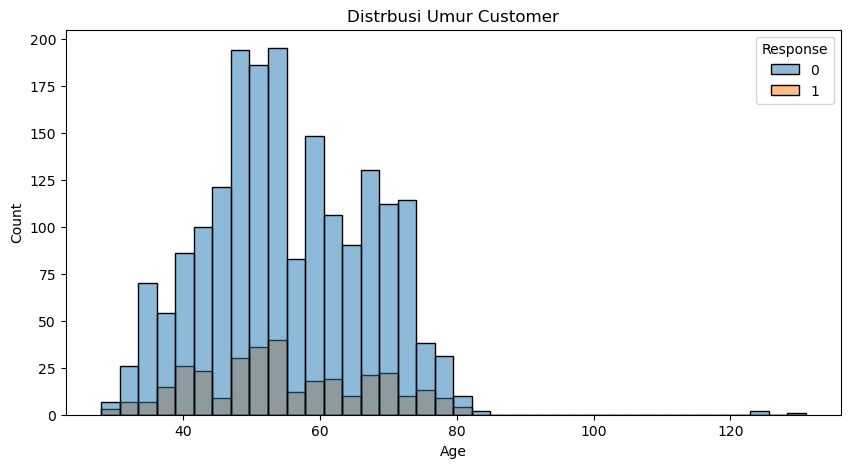

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'Age', hue = 'Response')
plt.title('Distrbusi Umur Customer')
plt.show()

kebanyakan customer yang respon dan yang tidak antara umur 40 - 55 tahun

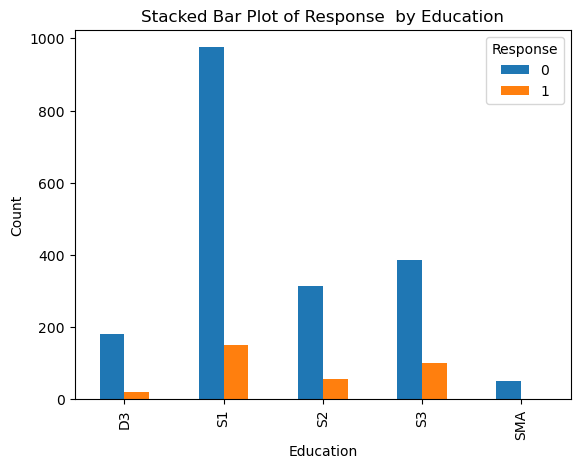

In [16]:
result = df.groupby(['Education', 'Response']).size().unstack()

# Create bar plot
result.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Response  by Education')

# Show legend
plt.legend(title='Response', loc='upper right')

# Show plot
plt.show()

kebanyakan customer memiliki latar belakang pendidikan S1.

sekitar 10% dari populasi D3 yang respon, sekitar 13% dari populasi S1 yang respon, sekitar 15% dari populasi S2 yang respon, sekitar 20% dari populasi S3 yang respon, sekitar 3% yang repon dari populasi SMA. dari setiap masing masing tingkat pendidikan yang paling besar respon nya adalah S3 sekitar 20% yang respon dan 80% yang tidak respon di populasinya


In [17]:
result

Response,0,1
Education,,
D3,181,22
S1,975,152
S2,313,57
S3,385,101
SMA,52,2


In [18]:
f = df.groupby('Response').agg({'Income':'mean'}).reset_index()
f

,Response,Income
0,0,5.084568e+07
1,1,6.018324e+07


Text(0, 0.5, 'rata rata income')

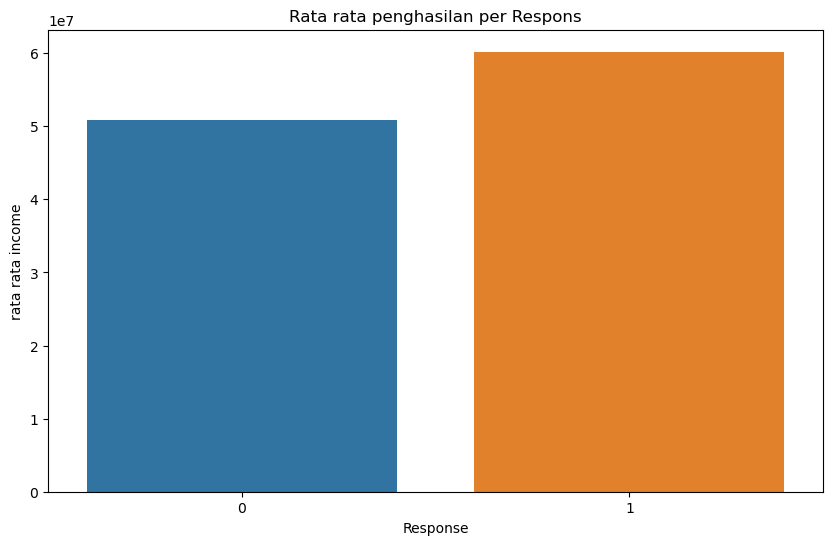

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data = f, x ='Response',y ='Income')
plt.title('Rata rata penghasilan per Respons')
plt.ylabel('rata rata income')

orang yang respons memiliki rata rata penghasilan yang lebih besar dari yang non respon

In [20]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year
0,67,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,...,4,7,0,0,0,0,0,0,1,2012
1,70,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,...,2,5,0,0,0,0,0,0,0,2014
2,59,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,...,10,4,0,0,0,0,0,0,0,2013
3,40,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,...,4,6,0,0,0,0,0,0,0,2014
4,43,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,...,6,5,0,0,0,0,0,0,0,2014


In [21]:
df.groupby('Response').agg({'Kidhome':'sum'})

,Kidhome
Response,
0,881
1,114


orang yang tidak respon memiliki anak paling banyak dari yang respon

In [22]:
df.groupby('Response').agg({'Teenhome':'sum'})

,Teenhome
Response,
0,1032
1,102


orang yang tidak respon memiliki jumlah anak yang tinggi daripada orang yang respon

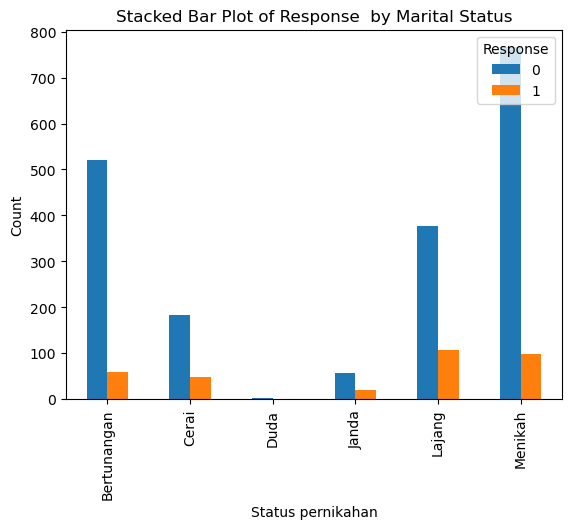

In [23]:
result = df.groupby(['Marital_Status', 'Response']).size().unstack()

# Create bar plot
result.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Status pernikahan')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Response  by Marital Status')

# Show legend
plt.legend(title='Response', loc='upper right')

# Show plot
plt.show()

kebanyakan customer memiliki status menikah, dan paling sedikit adalah duda.

In [24]:
result = df.groupby(['Marital_Status', 'Response']).size().unstack()
result

Response,0,1
Marital_Status,,
Bertunangan,520,60
Cerai,184,48
Duda,2,1
Janda,58,19
Lajang,376,108
Menikah,766,98


In [25]:
f = df.groupby('Response').agg({'Recency':'sum'}).reset_index()
f

,Response,Recency
0,0,98187
1,1,11818


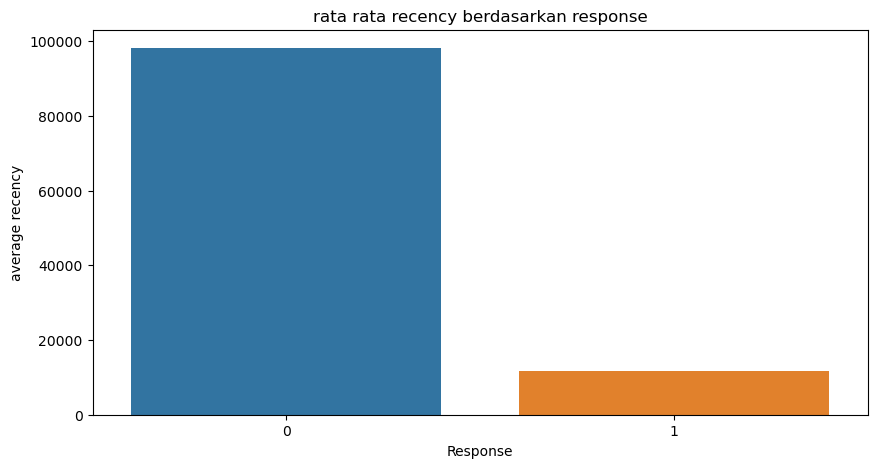

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data = f, x = 'Response', y = 'Recency')
plt.ylabel('average recency')
plt.title('rata rata recency berdasarkan response')
plt.show()

orang yang tidak respon memiliki rata rata recency yang besar dari yang respon

In [27]:
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year
0,67,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,...,4,7,0,0,0,0,0,0,1,2012
1,70,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,...,2,5,0,0,0,0,0,0,0,2014
2,59,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,...,10,4,0,0,0,0,0,0,0,2013
3,40,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,...,4,6,0,0,0,0,0,0,0,2014
4,43,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,...,6,5,0,0,0,0,0,0,0,2014


In [28]:
t = df.groupby(['year','Response']).agg({'MntCoke':'mean'})
t

MntCoke
year Response               
2012 0         359875.690608
     1         468136.363636
2013 0         262873.429952
     1         551967.532468
2014 0         217218.074656
     1         439708.333333

<Axes: xlabel='year', ylabel='MntCoke'>

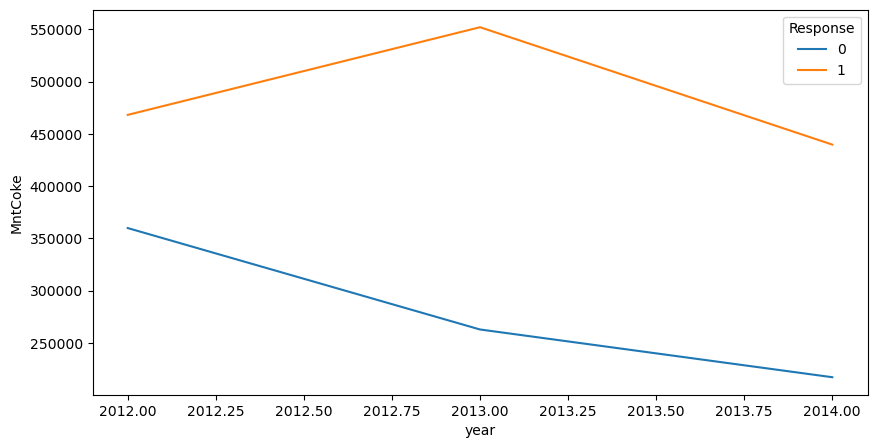

In [29]:
plt.figure(figsize= (10,5))
sns.lineplot(data = t, x='year',y='MntCoke',hue = 'Response')

 orang yang respon mengeluarkan rata rata uang nya untuk membeli minuman setiap tahunnya lebih tinggi dari pada orang yang tidak respon. orang yang tidak respon mengalami penurunan setiap tahunnya. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntCoke              2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

<Axes: xlabel='year', ylabel='MntFruits'>

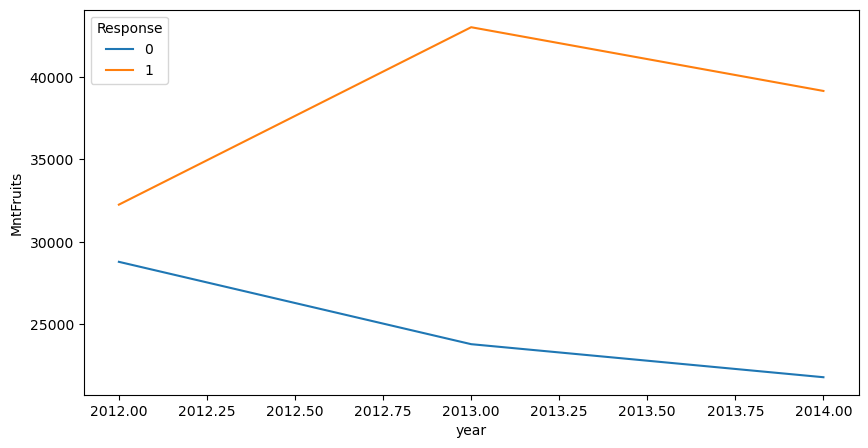

In [31]:
y = df.groupby(['year','Response']).agg({'MntFruits':'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = y, x = 'year', y = 'MntFruits', hue = 'Response')


orang yang respon memiliki rata rata biaya untuk membeli produk buah buahan  setiap tahun nya lebih tinggi dari yang tidak respon, mengalami kenaikan setiap tahunnya, sedangkan orang yang tidak respon mengalami penurunan setiap tahunnya.

In [32]:
r = df.groupby(['year','Response']).agg({'MntMeatProducts':'mean'})

<Axes: xlabel='year', ylabel='MntMeatProducts'>

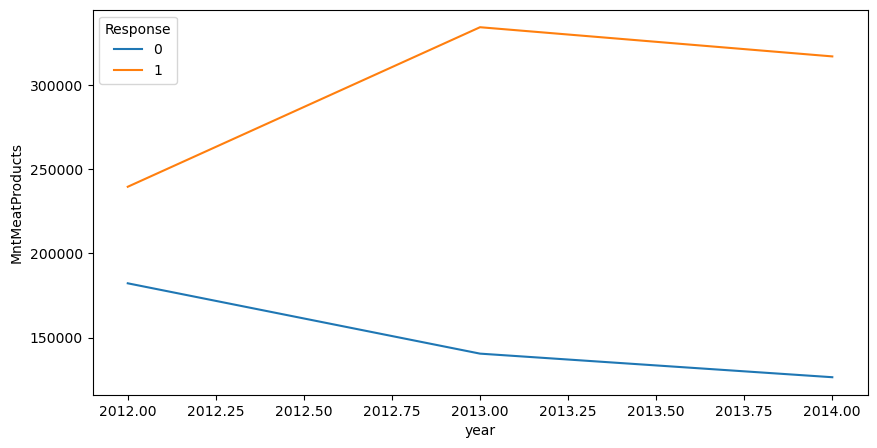

In [33]:
plt.figure(figsize = (10,5))
sns.lineplot(data =r, x= 'year', y = 'MntMeatProducts',hue = 'Response')

orang yang respon memiliki rata rata biaya untuk membeli produk daging  setiap tahun nya lebih tinggi dari yang tidak respon, mengalami kenaikan signifikan terjadi sejak tahun 2012 - 2013 , sedangkan orang yang tidak respon mengalami penurunan setiap tahunnya.

<Axes: xlabel='year', ylabel='MntFishProducts'>

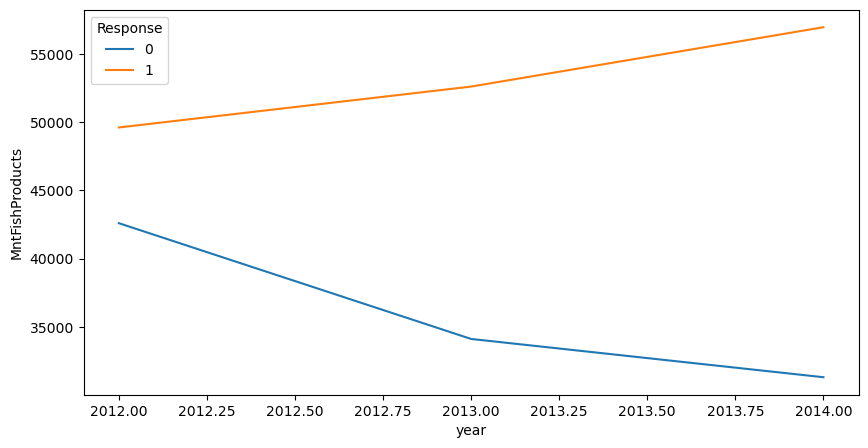

In [34]:
u = df.groupby(['year','Response']).agg({'MntFishProducts':'mean'})
plt.figure(figsize= (10,5))
sns.lineplot(data = u , x = 'year',y = 'MntFishProducts',hue = 'Response')

orang yang respon memiliki rata rata biaya untuk membeli produk ikan  setiap tahun nya lebih tinggi dari yang tidak respon, mengalami kenaikan setiap tahunnya, sedangkan orang yang tidak respon mengalami penurunan setiap tahunnya.

<Axes: xlabel='year', ylabel='MntSweetProducts'>

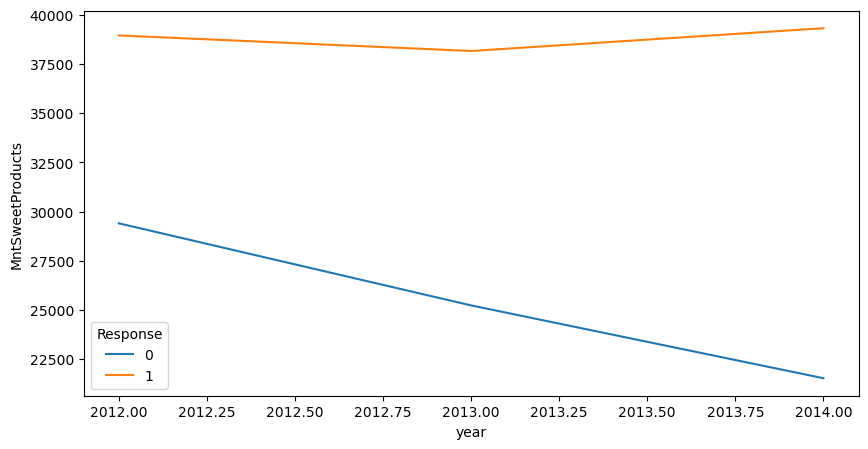

In [35]:
q = df.groupby(['year','Response']).agg({'MntSweetProducts' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = q , x = 'year', y = 'MntSweetProducts', hue = 'Response')


orang yang tidak respon mengalami penurunan setiap tahun nya

<Axes: xlabel='year', ylabel='MntGoldProds'>

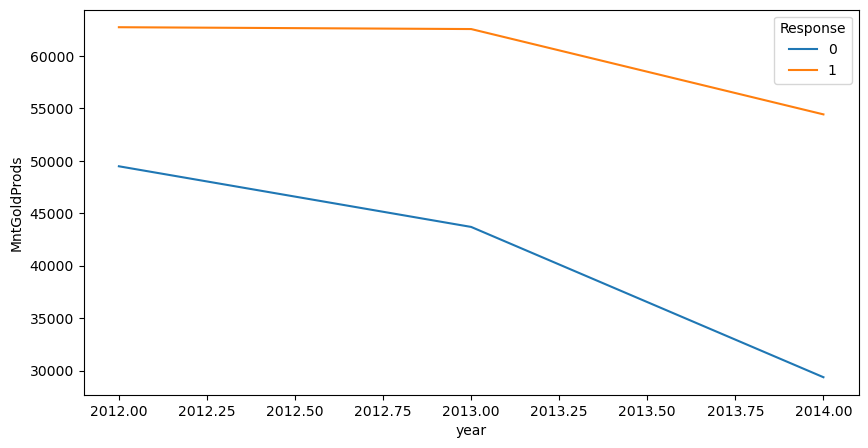

In [36]:
q = df.groupby(['year','Response']).agg({'MntGoldProds' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = q , x = 'year', y = 'MntGoldProds', hue = 'Response')

orang yang respon dan tidak mengalami penurunan rata rata biaya yang dikeluarkan untuk membeli produk emas sejak tahun 2013 - 2014

<Axes: xlabel='year', ylabel='NumDealsPurchases'>

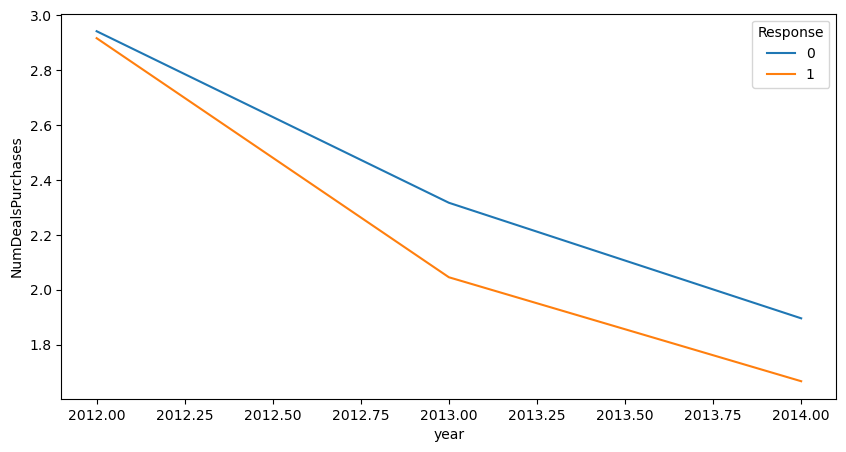

In [37]:
a = df.groupby(['year','Response']).agg({'NumDealsPurchases' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = a , x = 'year', y = 'NumDealsPurchases', hue = 'Response')

<Axes: xlabel='year', ylabel='NumCatalogPurchases'>

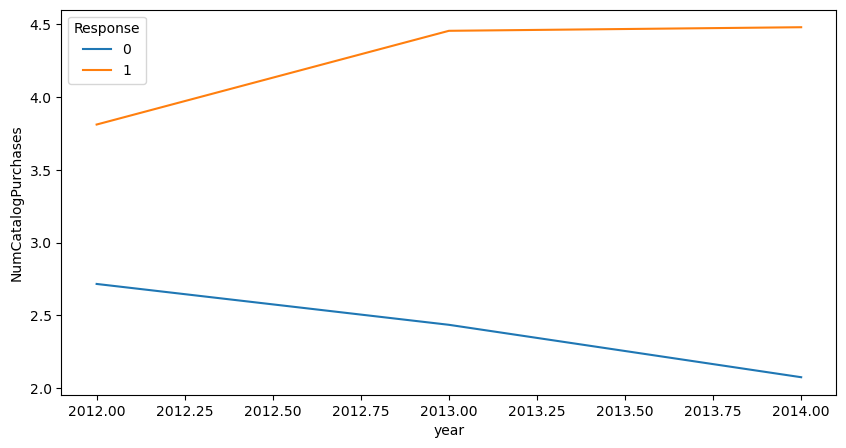

In [38]:
at = df.groupby(['year','Response']).agg({'NumCatalogPurchases' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = at , x = 'year', y = 'NumCatalogPurchases', hue = 'Response')

<Axes: xlabel='year', ylabel='NumWebPurchases'>

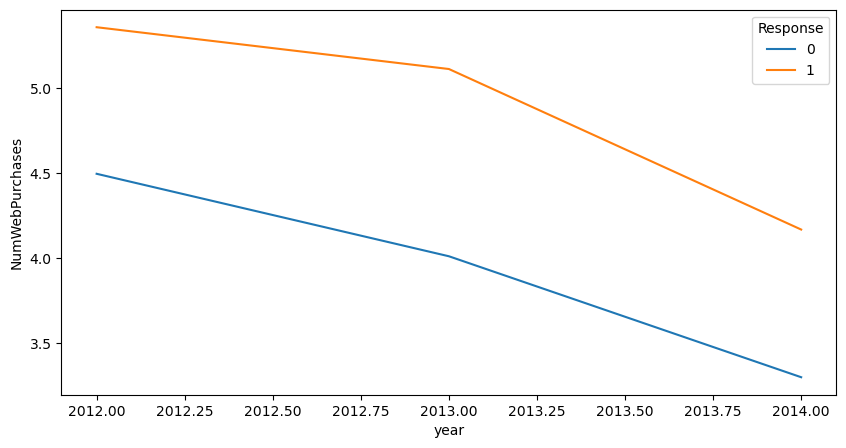

In [39]:
ar = df.groupby(['year','Response']).agg({'NumWebPurchases' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = ar , x = 'year', y = 'NumWebPurchases', hue = 'Response')

<Axes: xlabel='year', ylabel='NumStorePurchases'>

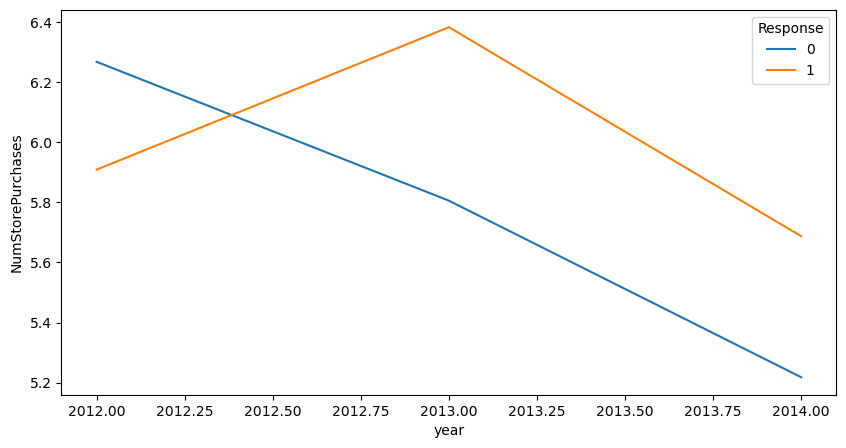

In [40]:
are = df.groupby(['year','Response']).agg({'NumStorePurchases' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = are , x = 'year', y = 'NumStorePurchases', hue = 'Response')

<Axes: xlabel='year', ylabel='Complain'>

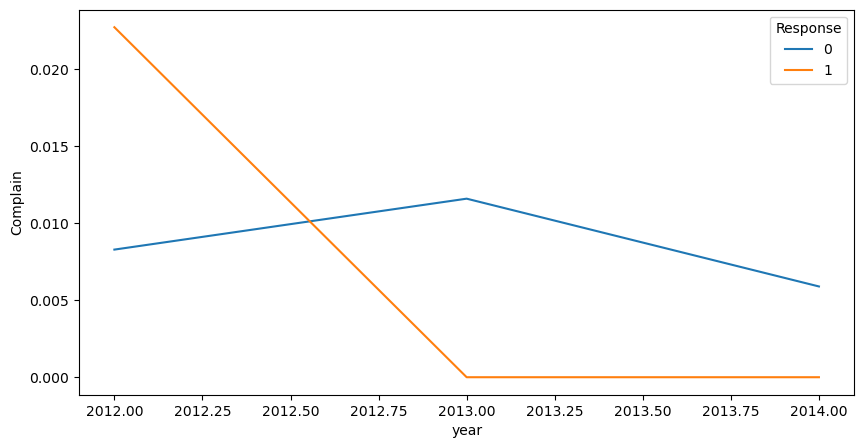

In [41]:
are = df.groupby(['year','Response']).agg({'Complain' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = are , x = 'year', y = 'Complain', hue = 'Response')

komplain oleh customer yang respon mengalami penurunan dari tahun 2012- 2013, dan dari tahun 2013 - 2014 tidak mengalami perubahan.
komplain oleh customer yang tidak respon selalu stabil dimana tahun 2013 mengalami peningkatan.

In [42]:
num

,Age,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,67,58138000.0,0,0,58,635000,88000,546000,172000,88000,...,7,0,0,0,0,0,0,3,11,1
1,70,46344000.0,1,1,38,11000,1000,6000,2000,1000,...,5,0,0,0,0,0,0,3,11,0
2,59,71613000.0,0,0,26,426000,49000,127000,111000,21000,...,4,0,0,0,0,0,0,3,11,0
3,40,26646000.0,1,0,26,11000,4000,20000,10000,3000,...,6,0,0,0,0,0,0,3,11,0
4,43,58293000.0,1,0,94,173000,43000,118000,46000,27000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,61223000.0,0,1,46,709000,43000,182000,42000,118000,...,5,0,0,0,0,0,0,3,11,0
2236,78,64014000.0,2,1,56,406000,0,30000,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,43,56981000.0,0,0,91,908000,48000,217000,32000,12000,...,6,0,1,0,0,0,0,3,11,0
2238,68,69245000.0,0,1,8,428000,30000,214000,80000,30000,...,3,0,0,0,0,0,0,3,11,0


<Axes: xlabel='year', ylabel='NumWebVisitsMonth'>

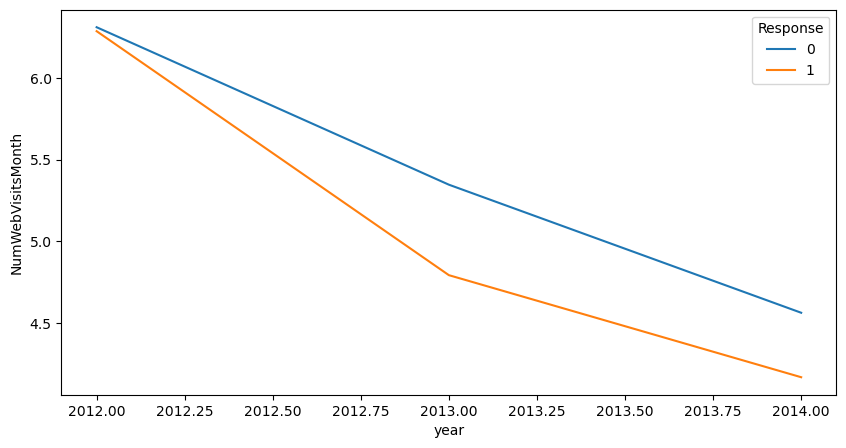

In [43]:
aret = df.groupby(['year','Response']).agg({'NumWebVisitsMonth' : 'mean'})
plt.figure(figsize = (10,5))
sns.lineplot(data = aret , x = 'year', y = 'NumWebVisitsMonth', hue = 'Response')

kunjungan ke website mengalami penurunan setiap tahunnya

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntCoke              2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [45]:
t1 = df.groupby('year').agg({'MntCoke':'sum'}).reset_index()
t2 = df.groupby('year').agg({'MntFruits' : 'sum'}).reset_index()
t3 = df.groupby('year').agg({'MntMeatProducts':'sum'}).reset_index()
t4 = df.groupby('year').agg({'MntFishProducts':'sum'}).reset_index()
t5 = df.groupby('year').agg({'MntSweetProducts':'sum'}).reset_index()
t6 = df.groupby('year').agg({'MntGoldProds':'sum'}).reset_index()

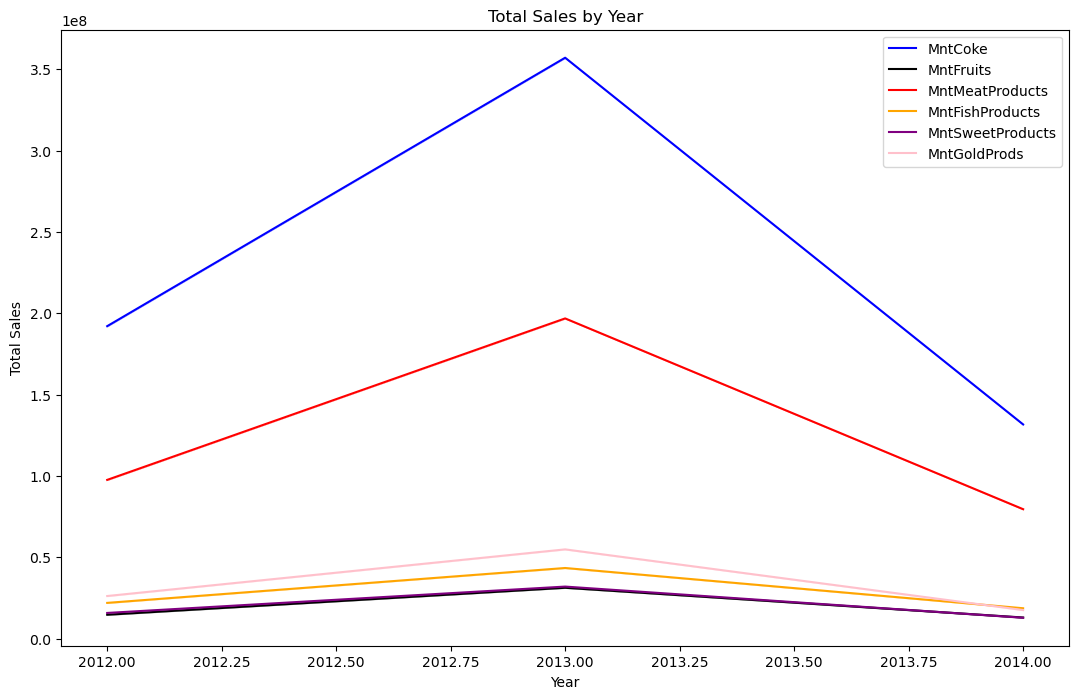

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming t1, t2, t3, t4, t5, t6 are pandas dataframes with the same structure
# and contain the total sales for each product category for each year

# Concatenate all dataframes into one
all_data = pd.concat([t1, t2, t3, t4, t5, t6], ignore_index=False)

# Plot the total sales for each product category for each year
plt.figure(figsize = (13,8))
sns.lineplot(data = all_data, x='year', y ='MntCoke', label = 'MntCoke', color='blue')
sns.lineplot(data = all_data, x='year', y ='MntFruits', label = 'MntFruits', color='black')
sns.lineplot(data = all_data, x='year', y ='MntMeatProducts', label = 'MntMeatProducts', color='red')
sns.lineplot(data = all_data, x='year', y ='MntFishProducts', label = 'MntFishProducts', color='orange')
sns.lineplot(data = all_data, x='year', y ='MntSweetProducts', label = 'MntSweetProducts', color='purple')
sns.lineplot(data = all_data, x='year', y ='MntGoldProds', label = 'MntGoldProds', color='pink')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.legend()

plt.show()

dari ke enam produk penjualan paling banyak adalah produk minuman di tahun 2013 mencapai penjualan terbanyak. produk buah buahan dan produk makanan manis memiliki penjualan yang sangat kecil dari produk lain

In [47]:
df

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year
0,67,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,...,4,7,0,0,0,0,0,0,1,2012
1,70,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,...,2,5,0,0,0,0,0,0,0,2014
2,59,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,...,10,4,0,0,0,0,0,0,0,2013
3,40,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,...,4,6,0,0,0,0,0,0,0,2014
4,43,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,...,6,5,0,0,0,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,S1,Menikah,61223000.0,0,1,2013-06-13,46,709000,43000,...,4,5,0,0,0,0,0,0,0,2013
2236,78,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,406000,0,...,5,7,0,0,0,1,0,0,0,2014
2237,43,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,...,13,6,0,1,0,0,0,0,0,2014
2238,68,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,...,10,3,0,0,0,0,0,0,0,2014


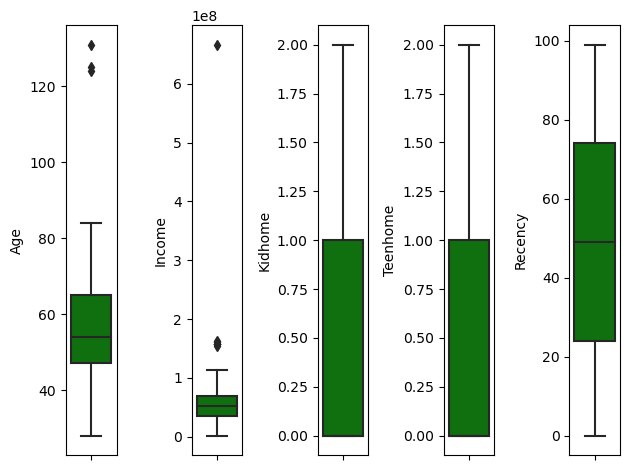

In [48]:
q1 = ['Age','Income','Kidhome','Teenhome','Recency']
for i in range(0,len(q1)):
    plt.subplot(1,len(q1),i+1)
    sns.boxplot(y=df[q1[i]],color = 'green',orient = 'v')
    plt.tight_layout()

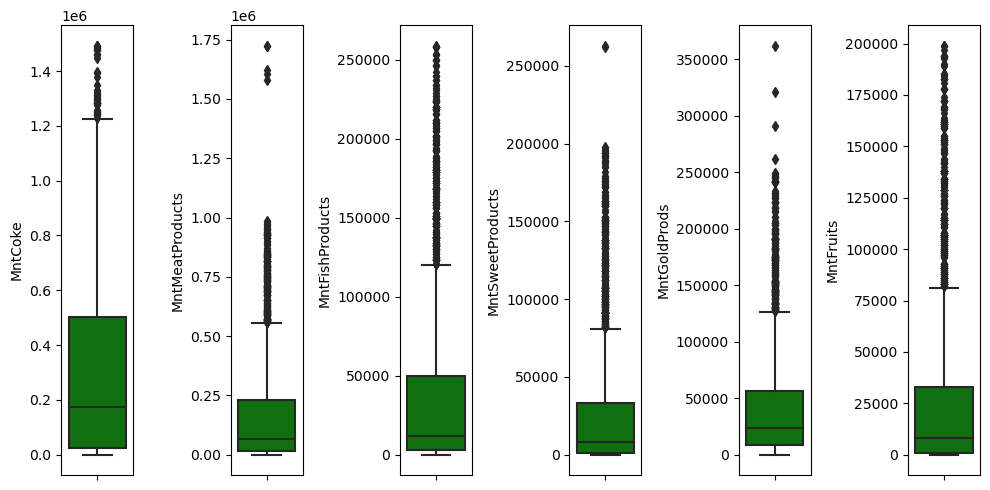

In [49]:
q2 = ['MntCoke','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntFruits']
plt.figure(figsize= (10,5))
for i in range(0, len(q2)):
    plt.subplot(1,len(q2), i+1)
    sns.boxplot(y =df[q2[i]], color = 'green', orient ='v')
    plt.tight_layout()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntCoke              2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

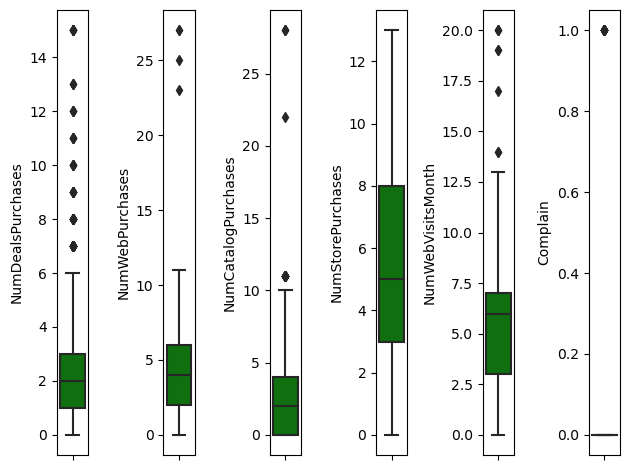

In [51]:
q3 = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']
for i in range(0,len(q3)):
    plt.subplot(1,len(q3),i+1)
    sns.boxplot(y=df[q3[i]],color ='green', orient ='v')
    plt.tight_layout()

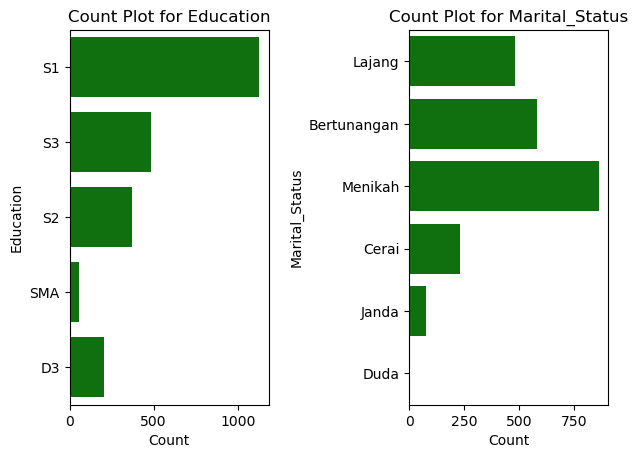

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

q4 = ['Education','Marital_Status']
for i in range(len(q4)):
    plt.subplot(1, len(q4), i+1)
    sns.countplot(y=df[q4[i]], color='green', orient='h')
    plt.title(f'Count Plot for {q4[i]}')
    plt.xlabel('Count')
    plt.ylabel(q4[i])
    plt.tight_layout(pad=1.5)  # Memberikan ruang di antara subplot

plt.show()

kebanyakan customer berstatus menikah dan berpendidikan S1

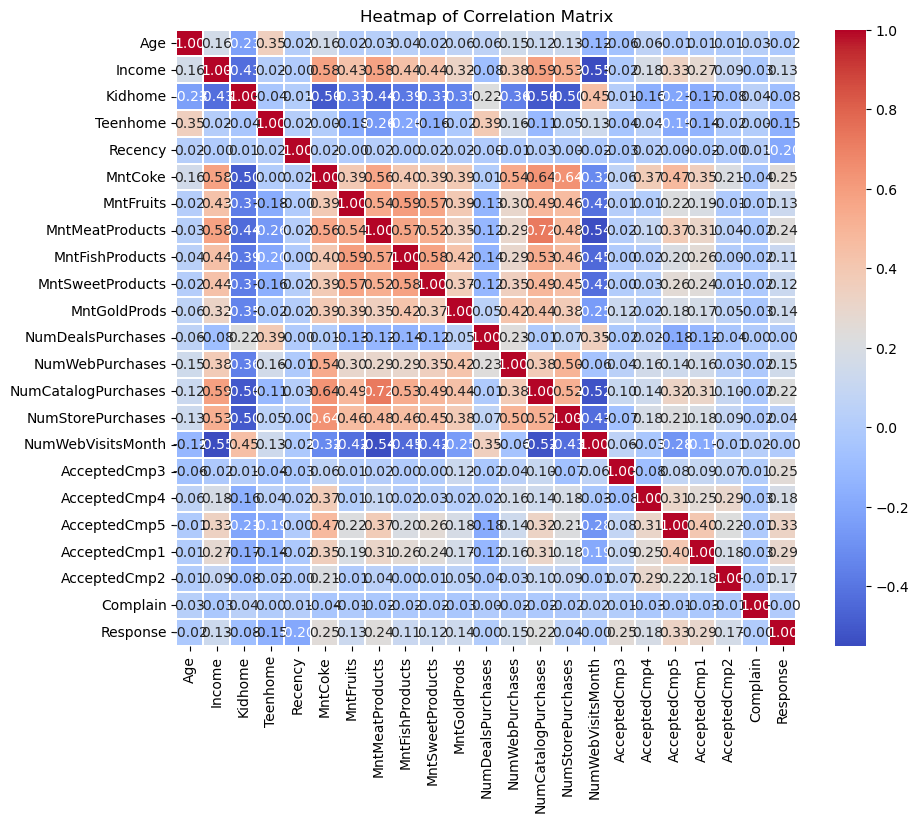

In [53]:
e = ['Education','Marital_Status','Dt_Customer','year']
e1 = df.drop(columns = e)
corr_matrix = e1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# data processing

In [54]:
#mengecek data yang kosong
df.isna().sum()

Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
year                   0
dtype: int64

In [55]:
#menghapus kolom Dt_customer
df= df.drop(columns = ['Dt_Customer','year'])

In [56]:
#mengecek data yang duplikat
df.duplicated().sum()

183

In [57]:
#menghapus nilai duplikat
df = df.drop_duplicates()

In [58]:
df.duplicated().sum()

0

In [59]:
#hadle outlier
import numpy as np 
from scipy import stats
print(f'jumlah baris sebelum memfilter outlier: {len(df)}')

filtered = np.array((True) * len(df))
st = df.drop(columns = ['Education','Marital_Status','Response'])

for col in st:
    zscore = abs(stats.zscore(df[col]))
    filtered = (zscore < 3) & filtered
df = df[filtered]

print(f'jumlah baris sesudah filter outlier: {len(df)}')
     

jumlah baris sebelum memfilter outlier: 2057
jumlah baris sesudah filter outlier: 1454


In [60]:
#label encoder
df['Education'] = df['Education'].astype('category').cat.codes
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes

In [61]:
#handle class imbalance
from imblearn.over_sampling import SMOTE
X = df.drop(columns = 'Response')
y = df['Response']

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)
y_smote.value_counts()

Response
1    1339
0    1339
Name: count, dtype: int64

In [62]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote ,test_size = 0.2, shuffle=False)

In [91]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.multiclass import type_of_target

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.multiclass import type_of_target

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.utils.multiclass import type_of_target
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.utils.multiclass import type_of_target
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.multiclass import type_of_target

def eval_classification1(model, X_test, y_test, X_train, y_train):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    if type_of_target(y_test) != 'binary':
        print("roc_auc is not defined for multiclass problems.")
    else:
        if len(np.unique(y_test)) > 1:
            print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
            print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
        else:
            print("roc_auc is not defined when only one class is present in y_true.")

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model, X=X_train, y=y_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))
def confusion1(model):
    y_pred_proba = model.predict_proba(X_test)
    y_predict = model.predict(X_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

In [64]:
#model logisticregression
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(random_state=123)
logreg1.fit(X_train, y_train)

eval_classification1(logreg1, X_test, y_test, X_train, y_train)

Accuracy (Test Set): 0.23
Accuracy (Train Set): 0.66
Precision (Test Set): 1.00
Recall (Test Set): 0.23
Recall (Train Set): 0.22
F1-Score (Test Set): 0.38
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.6592352438839696
Accuracy (crossval test): 0.6560751294396154


In [65]:
#standarisasi model logisticregression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
eval_classification1(logreg1, X_test_scaled, y_test,X_train_scaled, y_train)

Accuracy (Test Set): 0.38
Accuracy (Train Set): 0.63
Precision (Test Set): 1.00
Recall (Test Set): 0.38
Recall (Train Set): 0.52
F1-Score (Test Set): 0.55
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.8051266733467706
Accuracy (crossval test): 0.8015721557777634


In [66]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model with hyperparameters to tune
logreg = LogisticRegression(random_state=123)
params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and evaluation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best evaluation score:', grid_search.best_score_)

# Train the logistic regression model with the best hyperparameters
logreg_best = grid_search.best_estimator_
logreg_best.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
eval_classification1(logreg_best, X_test_scaled, y_test, X_train_scaled, y_train)

Best hyperparameters: {'C': 1, 'solver': 'lbfgs'}
Best evaluation score: 0.7960057076879508
Accuracy (Test Set): 0.28
Accuracy (Train Set): 0.80
Precision (Test Set): 1.00
Recall (Test Set): 0.28
Recall (Train Set): 0.72
F1-Score (Test Set): 0.43
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.8051266733467706
Accuracy (crossval test): 0.8015721557777634


In [67]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)

eval_classification1(knn1, X_test, y_test, X_train, y_train)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 0.83
Precision (Test Set): 1.00
Recall (Test Set): 0.68
Recall (Train Set): 0.81
F1-Score (Test Set): 0.81
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.8250080435991458
Accuracy (crossval test): 0.7261166663035822


In [68]:
#standarisasi KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
eval_classification1(knn1,X_test_scaled,y_test,X_train_scaled,y_train)

Accuracy (Test Set): 0.00
Accuracy (Train Set): 0.63
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9083796478890348
Accuracy (crossval test): 0.8621175812764597


In [69]:
from sklearn.model_selection import GridSearchCV

# Define the KNN classifier with a hyperparameter to tune
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1, 11)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and evaluation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best evaluation score:', grid_search.best_score_)

# Train the KNN classifier with the best hyperparameters
knn_best = grid_search.best_estimator_
knn_best.fit(X_train, y_train)

# Evaluate the model on the test set
eval_classification1(knn_best, X_test, y_test, X_train, y_train)

Best hyperparameters: {'n_neighbors': 1}
Best evaluation score: 0.752105526871882
Accuracy (Test Set): 0.72
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.72
Recall (Train Set): 1.00
F1-Score (Test Set): 0.84
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.7542862122301375


In [70]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

eval_classification1(dt1, X_test, y_test, X_train, y_train)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.89
Recall (Train Set): 0.99
F1-Score (Test Set): 0.94
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.8476472126004837


In [71]:
eval_classification1(dt1, X_test_scaled, y_test, X_train_scaled, y_train)

Accuracy (Test Set): 0.00
Accuracy (Train Set): 0.63
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.8492030295768612


In [72]:
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier with a hyperparameter to tune
dt = DecisionTreeClassifier()
params = {'max_depth': [None, 10, 20, 30, 40, 50]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and evaluation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best evaluation score:', grid_search.best_score_)

# Train the decision tree classifier with the best hyperparameters
dt_best = grid_search.best_estimator_
dt_best.fit(X_train, y_train)

# Evaluate the model on the test set
eval_classification1(dt_best, X_test, y_test, X_train, y_train)

Best hyperparameters: {'max_depth': 20}
Best evaluation score: 0.8637137006295885
Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.88
Recall (Train Set): 0.99
F1-Score (Test Set): 0.94
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.8529398949959699


In [73]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
eval_classification1(rf, X_test, y_test, X_train, y_train)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.96
Recall (Train Set): 0.99
F1-Score (Test Set): 0.98
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.9388358785555047


In [74]:
eval_classification1(rf,X_test_scaled, y_test, X_train_scaled, y_train)

Accuracy (Test Set): 0.00
Accuracy (Train Set): 0.63
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.9374343724811015


In [75]:
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier with hyperparameters to tune
rf = RandomForestClassifier(random_state=123)
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and evaluation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best evaluation score:', grid_search.best_score_)

# Train the Random Forest classifier with the best hyperparameters
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

# Evaluate the model on the test set
eval_classification1(rf_best, X_test, y_test, X_train, y_train)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best evaluation score: 0.9435407271855869
Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.96
Recall (Train Set): 0.99
F1-Score (Test Set): 0.98
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.9382124625115279


In [76]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
eval_classification1(ad, X_test, y_test, X_train, y_train)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.88
Precision (Test Set): 1.00
Recall (Test Set): 0.82
Recall (Train Set): 0.83
F1-Score (Test Set): 0.90
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.8907563435444469
Accuracy (crossval test): 0.864141051056939


In [77]:
# standarisasi adaboost
eval_classification1(ad, X_test_scaled, y_test, X_train_scaled, y_train)

Accuracy (Test Set): 0.00
Accuracy (Train Set): 0.63
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.8907563435444469
Accuracy (crossval test): 0.864141051056939


In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Initialize AdaBoost classifier
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 50
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Now you can use the best model to make predictions
best_model1 = grid_search.best_estimator_
best_model1.fit(X_train, y_train)
y_pred = best_model1.predict(X_test)

# Evaluate the model using your evaluation function
eval_classification1(best_model1, X_test, y_test, X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=200; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=300; total time=   0.9s
[CV] END algorithm=SAMME, learning_ra

In [92]:
import xgboost as xgb

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Now you can use your evaluation function
eval_classification1(xgb_classifier, X_test, y_test, X_train, y_train)


Accuracy (Test Set): 0.99
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.99
Recall (Train Set): 0.99
F1-Score (Test Set): 0.99
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.9389930941332811


In [80]:
eval_classification1(xgb_classifier, X_test_scaled, y_test, X_train_scaled, y_train)

Accuracy (Test Set): 0.00
Accuracy (Train Set): 0.63
Precision (Test Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
roc_auc is not defined when only one class is present in y_true.
Accuracy (crossval train): 0.9956036877262509
Accuracy (crossval test): 0.9389930941332811


In [81]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Now you can use the best model to make predictions
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model using your evaluation function
eval_classification1(best_model, X_test, y_test, X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, 

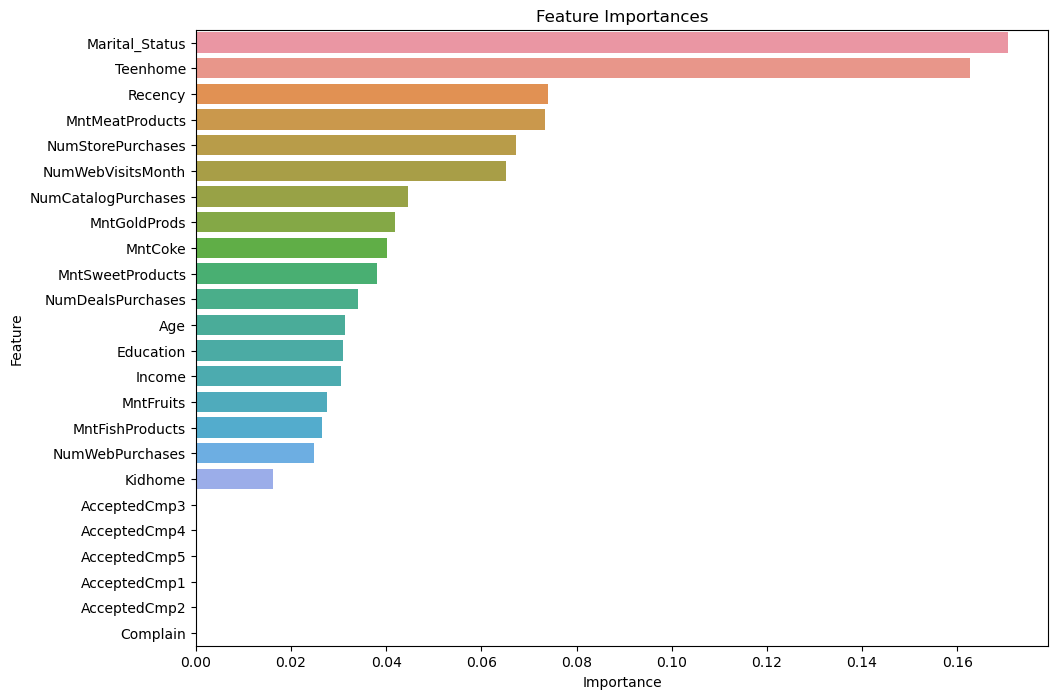

In [86]:


# Get feature importances
feature_importance = xgb_classifier.feature_importances_

# Get the column names (feature names) from the DataFrame
feature_names =x_smote.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(11, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()



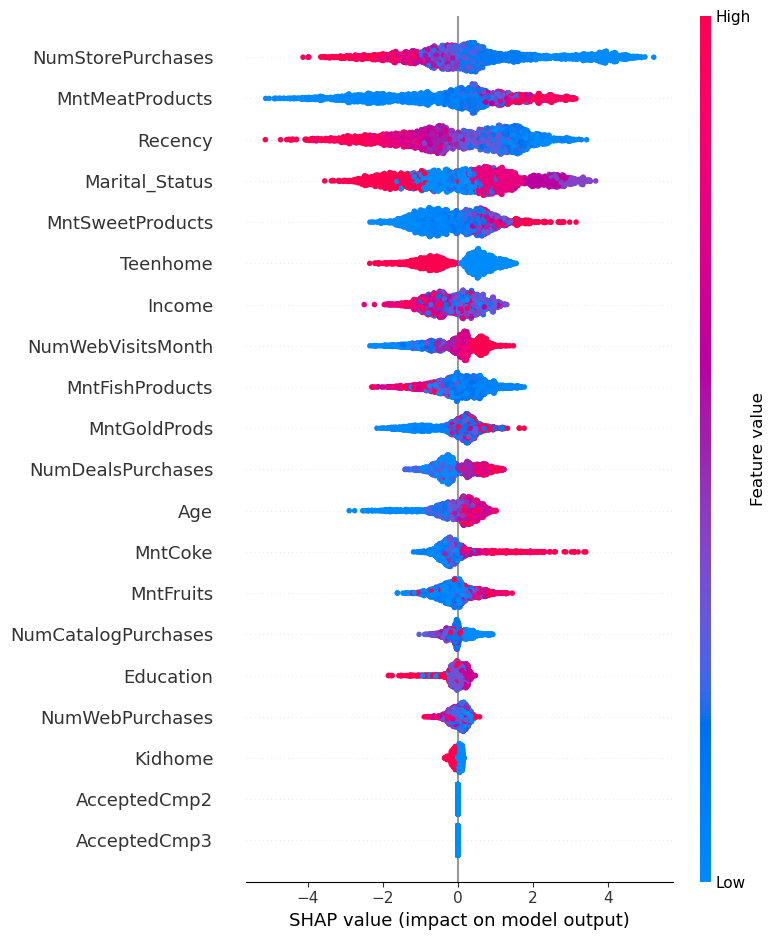

In [87]:
import shap

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_classifier)  # Assuming best_model is a tree-based model
shap_values = explainer.shap_values(x_smote)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, x_smote, feature_names=feature_names)
